In [1]:
import tensorflow as tf

In [11]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
    g.watch(x)
    with tf.GradientTape() as gg:
        gg.watch(x)
        y = x * x
    dy_dx = gg.gradient(y, x)
d2y_dx2 = g.gradient(dy_dx, x)
print(dy_dx)
print(d2y_dx2)

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [2]:
!echo %Path%

D:\Projetos 2\pixel-sides\venv\Scripts;C:\Program Files (x86)\Common Files\Intel\Shared Libraries\redist\intel64\compiler;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\libnvvp;C:\Program Files\Python39\Scripts\;C:\Program Files\Python39\;C:\Program Files\AdoptOpenJDK\jdk-11.0.10.9-hotspot\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\Git\cmd;C:\Users\fegem\AppData\Roaming\nvm;C:\Program Files\nodejs;C:\Users\fegem\AppData\Roaming\Python\Python39\Scripts;C:\Program Files\NVIDIA Corporation\Nsight Compute 2020.3.0\;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\extras\CUPTI\lib64;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\include;C:\Program Files\Graphviz\bin;C:\Users\fegem\AppData\Local

In [1]:
!which python

'which' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [3]:
import numpy as np

In [4]:
I = np.array([
    [1, 0, 5, 0, 2, 0],
    [0, 1, 0, 0, 0, 9],
    [0, 7, 0, 3, 0, 0],
    [1, 0, 0, 0, 0, 1],
    [2, 0, 2, 0, 6, 0]
])
H = np.array([
    [1, 1],
    [3, 2]
])

I_tf = tf.constant(I, dtype=tf.float32)
H_tf = tf.constant(H, dtype=tf.float32)

I_tf = I_tf[tf.newaxis, :, :, tf.newaxis]
H_tf = H_tf[:-1, :-1, tf.newaxis, tf.newaxis]

C_tf = tf.nn.conv2d(I_tf, H_tf, strides=[1, 1, 1, 1], padding="VALID")
print(C_tf)

tf.Tensor(
[[[[1.]
   [0.]
   [5.]
   [0.]
   [2.]
   [0.]]

  [[0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [9.]]

  [[0.]
   [7.]
   [0.]
   [3.]
   [0.]
   [0.]]

  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]]

  [[2.]
   [0.]
   [2.]
   [0.]
   [6.]
   [0.]]]], shape=(1, 5, 6, 1), dtype=float32)


In [5]:
from scipy.signal import convolve2d

print(np.rot90(convolve2d(np.rot90(I, 2), np.rot90(H, 2), mode='valid'), 2))

[[ 3 16 10  6 13]
 [10  9  3  3 27]
 [22 14  9  6  1]
 [ 4  2  2  6  9]]


In [19]:
from scipy.ndimage import convolve

print(convolve(I, H))

[[ 3 16 10  6 13 18]
 [10  9  3  3 27 45]
 [22 14  9  6  1  2]
 [ 4  2  2  6  9  5]
 [ 6  8  6 24 18  0]]


In [21]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
#     kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

print(convolve2D(I, H))

[[ 3.  8.  5.  2. 20.]
 [15. 22.  6.  9.  9.]
 [10.  7.  3.  3.  2.]
 [ 7.  4.  6. 12. 19.]]


In [13]:
from typing import List, Tuple, Union


def add_padding(matrix: np.ndarray, 
                padding: Tuple[int, int]) -> np.ndarray:
    """Adds padding to the matrix. 
    Args:
        matrix (np.ndarray): Matrix that needs to be padded. Type is List[List[float]] casted to np.ndarray.
        padding (Tuple[int, int]): Tuple with number of rows and columns to be padded. With the `(r, c)` padding we addding `r` rows to the top and bottom and `c` columns to the left and to the right of the matrix
    Returns:
        np.ndarray: Padded matrix with shape `n + 2 * r, m + 2 * c`.
    """
    n, m = matrix.shape
    r, c = padding
    
    padded_matrix = np.zeros((n + r * 2, m + c * 2))
    padded_matrix[r : n + r, c : m + c] = matrix
    
    return padded_matrix


def _check_params(matrix, kernel, stride, dilation, padding):
    params_are_correct = (isinstance(stride[0], int)   and isinstance(stride[1], int)   and
                          isinstance(dilation[0], int) and isinstance(dilation[1], int) and
                          isinstance(padding[0], int)  and isinstance(padding[1], int)  and
                          stride[0]   >= 1 and stride[1]   >= 1 and 
                          dilation[0] >= 1 and dilation[1] >= 1 and
                          padding[0]  >= 0 and padding[1]  >= 0)
    assert params_are_correct, 'Parameters should be integers equal or greater than default values.'
    if not isinstance(matrix, np.ndarray):
        matrix = np.array(matrix)
    n, m = matrix.shape
    matrix = matrix if list(padding) == [0, 0] else add_padding(matrix, padding)
    n_p, m_p = matrix.shape

    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    k = kernel.shape
    
    kernel_is_correct = k[0] % 2 == 1 and k[1] % 2 == 1
    assert kernel_is_correct, 'Kernel shape should be odd.'
    matrix_to_kernel_is_correct = n_p >= k[0] and m_p >= k[1]
    assert matrix_to_kernel_is_correct, 'Kernel can\'t be bigger than matrix in terms of shape.'
    
    h_out = np.floor((n + 2 * padding[0] - k[0] - (k[0] - 1) * (dilation[0] - 1)) / stride[0]).astype(int) + 1
    w_out = np.floor((m + 2 * padding[1] - k[1] - (k[1] - 1) * (dilation[1] - 1)) / stride[1]).astype(int) + 1
    out_dimensions_are_correct = h_out > 0 and w_out > 0
    assert out_dimensions_are_correct, 'Can\'t apply input parameters, one of resulting output dimension is non-positive.'

    return matrix, kernel, k, h_out, w_out


def conv2d(matrix: Union[List[List[float]], np.ndarray], 
             kernel: Union[List[List[float]], np.ndarray], 
             stride: Tuple[int, int] = (1, 1), 
             dilation: Tuple[int, int] = (1, 1), 
             padding: Tuple[int, int] = (0, 0)) -> np.ndarray:
    """Makes a 2D convolution with the kernel over matrix using defined stride, dilation and padding along axes.
    Args:
        matrix (Union[List[List[float]], np.ndarray]): 2D matrix to be convolved.
        kernel (Union[List[List[float]], np.ndarray]): 2D odd-shaped matrix (e.g. 3x3, 5x5, 13x9, etc.).
        stride (Tuple[int, int], optional): Tuple of the stride along axes. With the `(r, c)` stride we move on `r` pixels along rows and on `c` pixels along columns on each iteration. Defaults to (1, 1).
        dilation (Tuple[int, int], optional): Tuple of the dilation along axes. With the `(r, c)` dilation we distancing adjacent pixels in kernel by `r` along rows and `c` along columns. Defaults to (1, 1).
        padding (Tuple[int, int], optional): Tuple with number of rows and columns to be padded. Defaults to (0, 0).
    Returns:
        np.ndarray: 2D Feature map, i.e. matrix after convolution.
    """
    matrix, kernel, k, h_out, w_out = _check_params(matrix, kernel, stride, dilation, padding)
    matrix_out = np.zeros((h_out, w_out))
    
    b = k[0] // 2, k[1] // 2
    center_x_0 = b[0] * dilation[0]
    center_y_0 = b[1] * dilation[1]
    for i in range(h_out):
        center_x = center_x_0 + i * stride[0]
        indices_x = [center_x + l * dilation[0] for l in range(-b[0], b[0] + 1)]
        for j in range(w_out):
            center_y = center_y_0 + j * stride[1]
            indices_y = [center_y + l * dilation[1] for l in range(-b[1], b[1] + 1)]

            submatrix = matrix[indices_x, :][:, indices_y]

            matrix_out[i][j] = np.sum(np.multiply(submatrix, kernel))
    return matrix_out


def apply_filter_to_image(image: np.ndarray, 
                          kernel: List[List[float]]) -> np.ndarray:
    """Applies filter to the given image.
    Args:
        image (np.ndarray): 3D matrix to be convolved. Shape must be in HWC format.
        kernel (List[List[float]]): 2D odd-shaped matrix (e.g. 3x3, 5x5, 13x9, etc.).
    Returns:
        np.ndarray: image after applying kernel.
    """
    kernel = np.asarray(kernel)
    b = kernel.shape
    return np.dstack([conv2d(image[:, :, z], kernel, padding=(b[0]//2,  b[1]//2)) 
                      for z in range(3)]).astype('uint8')

In [15]:
C = conv2d(I, H, stride=(1, 1), dilation=(1,1), padding=(0, 0))
print(C)

AssertionError: Kernel shape should be odd.

In [20]:
def twodeeconv(x, f):
    lines, cols = x.shape
    f_lines, f_cols = f.shape

    lines = lines - f_lines + 1
    cols = cols - f_cols + 1
    
    y = np.zeros((lines, cols))
    for i in range(lines):
        for j in range(cols):
            y[i][j] = 0
            for i_f in range(f_lines):
                for j_f in range(f_cols):
                    y[i][j] += x[i+i_f][j+j_f]*f[i_f][j_f]
                    
    return y

twodeeconv(I, H)

array([[ 3.,  8.,  5.,  2., 20.],
       [15., 22.,  6.,  9.,  9.],
       [10.,  7.,  3.,  3.,  2.],
       [ 7.,  4.,  6., 12., 19.]])

In [40]:
a = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
b = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
c = np.array([
    [0, -1, 0],
    [0, -1, 0],
    [0, -1, 0,]
])
d = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0,]
])
twodeeconv(np.array([
    [0, 0, 1, 5, 6, 7, 0, 0, 0],
    [0, 0, 1, 8, 6, 5, 0, 0, 0],
    [0, 0, 2, 6, 4, 10, 1, 1, 0]
]), a)

array([[ -4., -19., -12.,  -3.,  15.,  21.,   1.]])

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Conv2D(1, 5, strides=(2,2), padding="same", input_shape=(100, 100, 1)),
        layers.Conv2D(1, 5, strides=2, padding="same"),
        layers.Conv2D(1, 5, strides=2, padding="same"),
        layers.Conv2D(1, 5, strides=2, padding="same")
    ]
)
# Call model on a test input
x = tf.ones((1, 100, 100, 1))
y = model(x)
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 50, 50, 1)         26        
                                                                 
 conv2d_29 (Conv2D)          (None, 25, 25, 1)         26        
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 1)         26        
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 1)           26        
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [30]:
import math

class ReceptiveFieldCalculator():
    def calculate(self, architecture, input_image_size):
        input_layer = ('input_layer', input_image_size, 1, 1, 0.5)
        self._print_layer_info(input_layer)
        
        for key in architecture:
            current_layer = self._calculate_layer_info(architecture[key], input_layer, key)
            self._print_layer_info(current_layer)
            input_layer = current_layer
            
    def _print_layer_info(self, layer):
        print(f'------')
        print(f'{layer[0]}: n = {layer[1]}; r = {layer[2]}; j = {layer[3]}; start = {layer[4]}')     
        print(f'------')
            
    def _calculate_layer_info(self, current_layer, input_layer, layer_name):
        n_in = input_layer[1]
        j_in = input_layer[2]
        r_in = input_layer[3]
        start_in = input_layer[4]
        
        k = current_layer[0]
        s = current_layer[1]
        p = current_layer[2]

        n_out = math.floor((n_in - k + 2*p)/s) + 1
        padding = (n_out-1)*s - n_in + k 
        p_right = math.ceil(padding/2)
        p_left = math.floor(padding/2)

        j_out = j_in * s
        r_out = r_in + (k - 1)*j_in
        start_out = start_in + ((k-1)/2 - p_left)*j_in
        return layer_name, n_out, j_out, r_out, start_out
    
    
    
my_net = {
    'conv1': [3, 1, 0],
    'conv2': [3, 1, 0],
    'conv3': [3, 1, 0],
    'conv4': [3, 1, 0]
}

calc = ReceptiveFieldCalculator().calculate(my_net, 100)


------
input_layer: n = 100; r = 1; j = 1; start = 0.5
------
------
conv1: n = 98; r = 1; j = 3; start = 1.5
------
------
conv2: n = 96; r = 1; j = 5; start = 2.5
------
------
conv3: n = 94; r = 1; j = 7; start = 3.5
------
------
conv4: n = 92; r = 1; j = 9; start = 4.5
------


In [41]:
model = keras.Sequential(
    [
        layers.Conv2D(6, 5, strides=1, padding="valid", input_shape=(100, 100, 3)),
        layers.MaxPool2D(3, strides=2, padding="valid"),
        layers.Conv2D(20, 5, strides=1, padding="same"),
        layers.MaxPool2D(8, strides=2, padding="valid"),
        layers.Conv2D(1, 1, strides=1, padding="valid"),
        layers.Softmax()
    ]
)
# Call model on a test input
x = tf.ones((1, 100, 100, 3))
y = model(x)
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 96, 96, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 6)        0         
 )                                                               
                                                                 
 conv2d_33 (Conv2D)          (None, 47, 47, 20)        3020      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 20)       0         
 2D)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 20, 20, 1)         21        
                                                                 
 softmax (Softmax)           (None, 20, 20, 1)        

min (-4705.2218380156955-56.24373496314756j), max (5255.064524250164-0j)
min -80.0583847519078, max 91.61748801558764


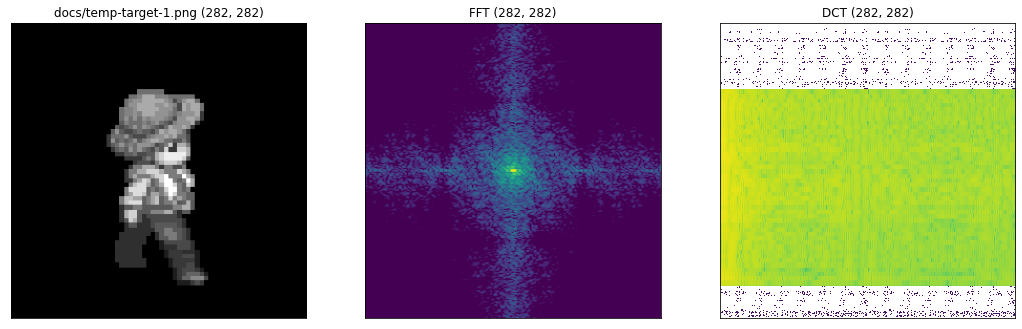

min (-4410.258560462633-27.0987122673529j), max (4825.901327877167-0j)
min -71.25748560765878, max 80.42663855120242


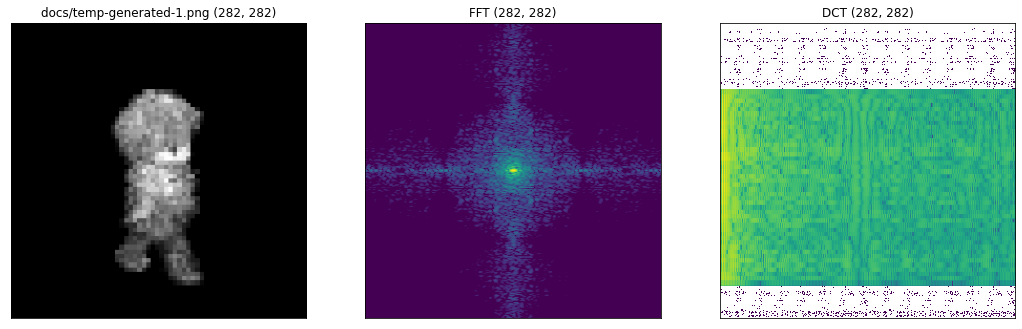

min (-275.1649344796543-24.462408720823525j), max (342.9012445448874-0j)
min -20.721182677637074, max 24.089252314941582


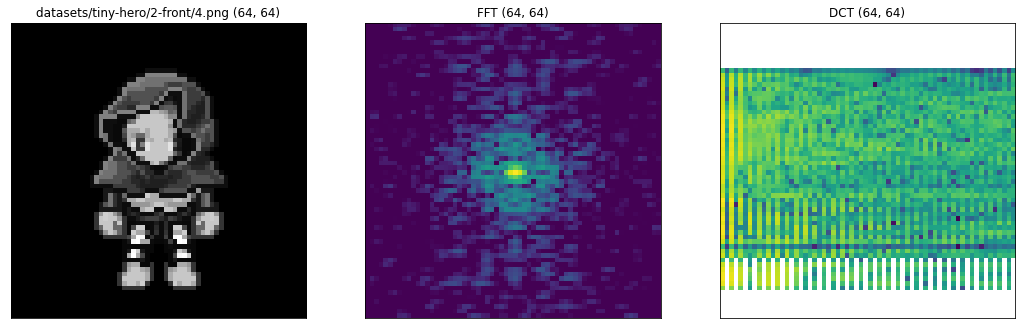

min (-230.26271244873436-10.87415080768923j), max (259.8116590316055-0j)
min -20.6767988142389, max 23.090072400475293


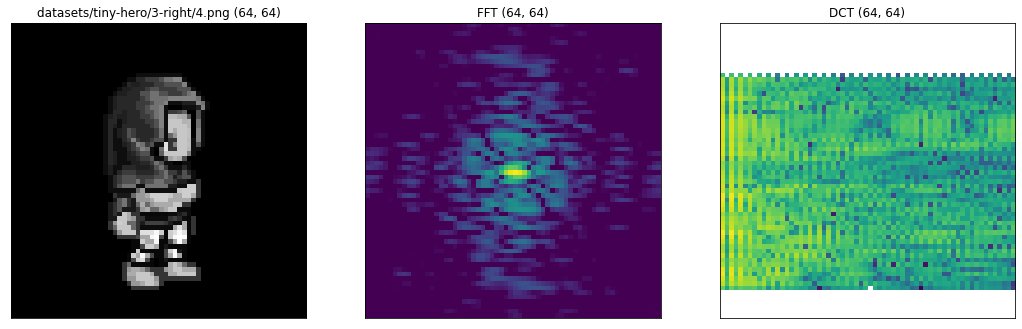

min (-95.01497699807537-6.4381488847667425j), max (100.40802370179222-0j)
min -13.07517518366454, max 13.9311248608917


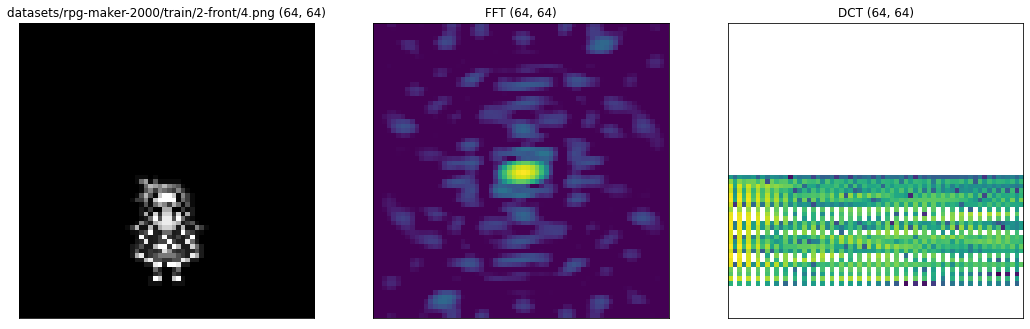

min (-81.03889014709921-9.683429273984059j), max (85.99103405081891-0j)
min -13.38554133948491, max 14.069138989205658


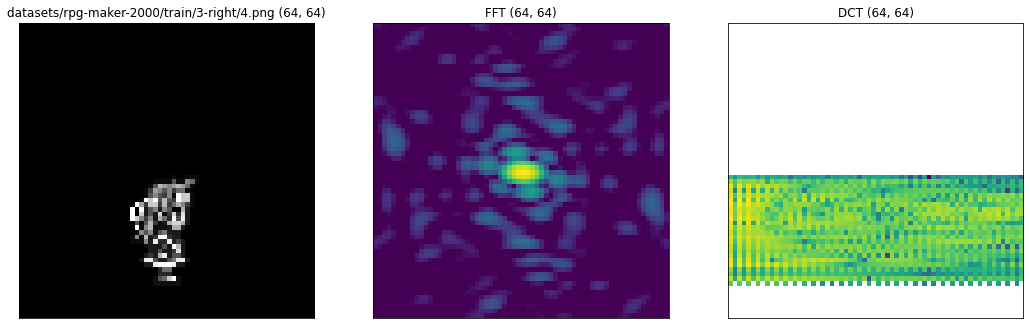

min (-276.05452346174815-3.704216943222854j), max (311.43152907071567-0j)
min -22.9243733788645, max 25.82542474181652


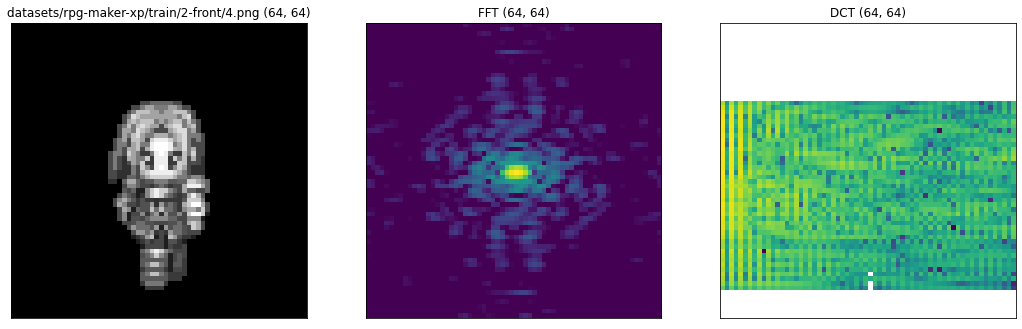

min (-235.34572463159654-2.150483411370149j), max (267.0949501171902-0j)
min -21.219664555814084, max 24.298569946479798


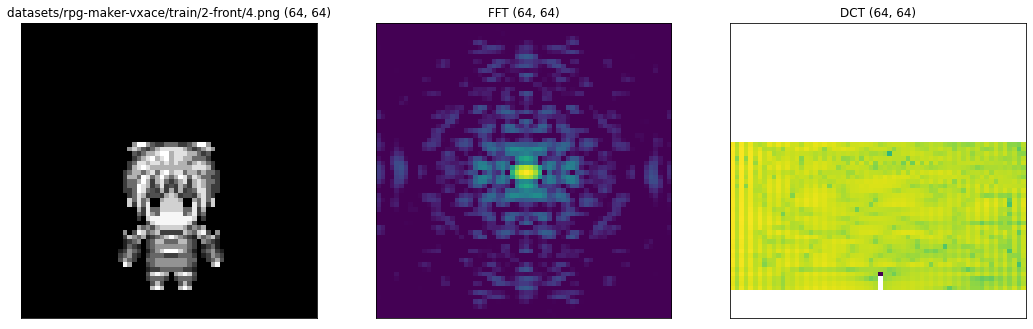

min (-198.95757727800188-22.861913848080924j), max (232.30647925930825-0j)
min -23.304652875628726, max 27.68843733073324


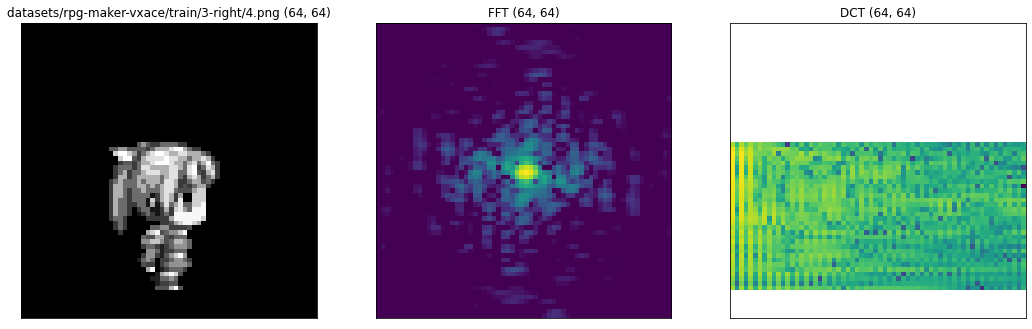

min (-95.52445271972324-34.836001920503996j), max (1157.4785207420564-0j)
min -7.845917297019455, max 48.57318658685311


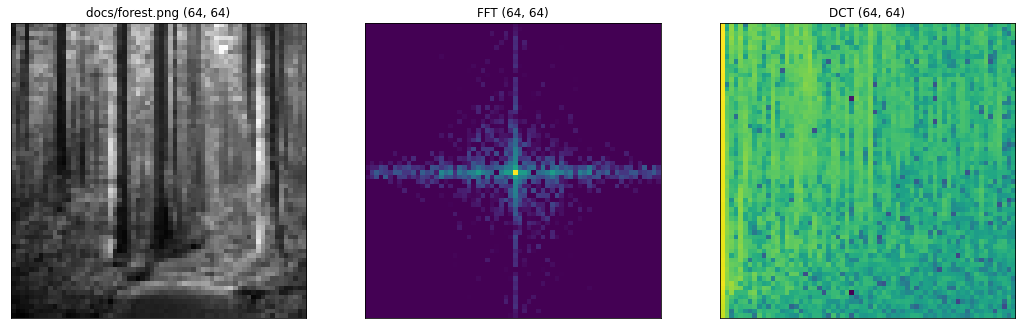

min (-185.85986776600623-84.99769059191235j), max (2634.971642026837-0j)
min -17.16408317444425, max 118.51191899690627


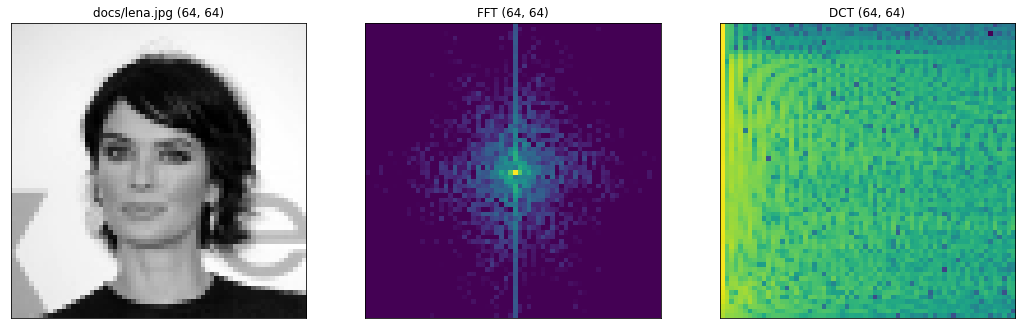

min (-17874.24974933402-112.46365580111048j), max (448491.1126-0j)
min -2090.847760343375, max 16691.9002


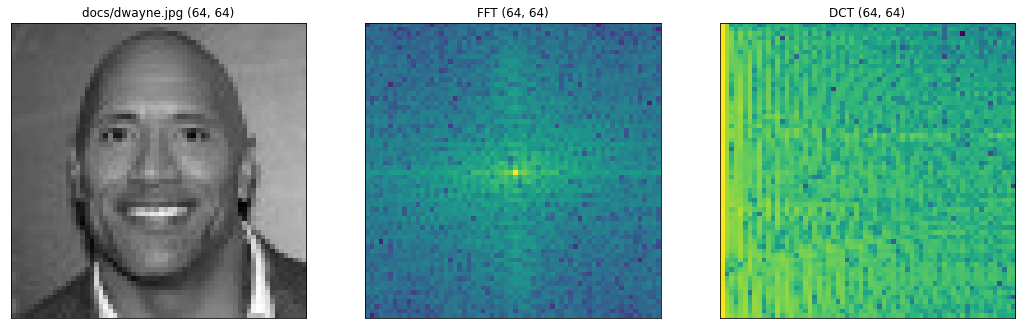

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import ndimage
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from skimage.color import rgb2gray

def show_spectrum(image_freq, title=''):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(np.abs(np.real(np.fft.fftshift(image_freq))), norm=LogNorm(vmin=5))
    ax.set_title("{} {}".format(title, image_freq.shape))
    plt.show()

def show_grayscale(image, title=''):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_axis_off()
    ax.set_title("{} {}".format(title, image.shape))
    plt.show()

def show_original_frequency_and_dct(image, fourier, cosine, title1="", title2="", title3=""):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title("{} {}".format(title1, image.shape))
    
    ax2.imshow(np.fft.fftshift(np.abs(fourier)), norm=colors.LogNorm(vmin=5))
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_title("{} {}".format(title2, fourier.shape))
    
    ax3.imshow(np.abs(cosine), norm=colors.LogNorm())
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_title("{} {}".format(title3, cosine.shape))
    
    plt.show()
    
files = ["docs/temp-target-1.png", "docs/temp-generated-1.png", "datasets/tiny-hero/2-front/4.png", "datasets/tiny-hero/3-right/4.png", "datasets/rpg-maker-2000/train/2-front/4.png", "datasets/rpg-maker-2000/train/3-right/4.png", "datasets/rpg-maker-xp/train/2-front/4.png", "datasets/rpg-maker-vxace/train/2-front/4.png", "datasets/rpg-maker-vxace/train/3-right/4.png", "docs/forest.png", "docs/lena.jpg", "docs/dwayne.jpg"]
for file in files:
    original = plt.imread(file).astype(float)
    original = rgb2gray(original[:,:,0:3])
    # show_grayscale(original, 'tiny-hero/4.png')

    original_freq = fft.fft2(original)
    original_dct = fft.dct(original)
    print(f"min {np.min(original_freq)}, max {np.max(original_freq)}")
    print(f"min {np.min(original_dct)}, max {np.max(original_dct)}")
    # show_spectrum(original_freq, "spectrum of tiny-hero/4.png")
    show_original_frequency_and_dct(original, original_freq, original_dct, file, "FFT", "DCT")


In [1]:
import tensorflow as tf
from pix2pix_model import Pix2PixModel

model = Pix2PixModel(tf.data.Dataset.range(10), tf.data.Dataset.range(10), "pix2pix-patch", "n2n", num_patches=30)
model.discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 target_image (InputLayer)      [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 concatenate_7 (Concatenate)    (None, 64, 64, 8)    0           ['input_image[0][0]',            
                                                                  'target_image[0][0]']           
                                                                                                  
 sequential_11 (Sequential)     (None, 32, 32, 8)    1024        ['concatenate_7[0][0]']    

In [19]:
# rescaling a tensor using nearest neighbor
data_2d = tf.constant([[1, 2], [3, 4]])
tf.repeat(tf.repeat(data_2d, 2, axis=0), 2, axis=1)

data_3d = tf.constant([
    [
        [1, 11, 91],
        [2, 12, 92]
    ],
    [
        [3, 13, 93],
        [4, 14, 94]
    ],
])
print(data_3d)
tf.repeat(tf.repeat(data_3d, 2, axis=0), 2, axis=1)

tf.Tensor(
[[[ 1 11 91]
  [ 2 12 92]]

 [[ 3 13 93]
  [ 4 14 94]]], shape=(2, 2, 3), dtype=int32)


<tf.Tensor: shape=(4, 4, 3), dtype=int32, numpy=
array([[[ 1, 11, 91],
        [ 1, 11, 91],
        [ 2, 12, 92],
        [ 2, 12, 92]],

       [[ 1, 11, 91],
        [ 1, 11, 91],
        [ 2, 12, 92],
        [ 2, 12, 92]],

       [[ 3, 13, 93],
        [ 3, 13, 93],
        [ 4, 14, 94],
        [ 4, 14, 94]],

       [[ 3, 13, 93],
        [ 3, 13, 93],
        [ 4, 14, 94],
        [ 4, 14, 94]]])>

In [24]:
# indexing a tensor shape
tensor = tf.constant([[1, 2], [3, 4], [5, 6]])
tf.shape(tensor).numpy()

array([3, 2])

In [12]:
# calculating keras mean vs tf reduce_mean (IT IS THE SAME THING)
from tensorflow import keras
from tensorflow import reduce_mean

y_pred = tf.constant([[1., 2.], [3., 4.]])
y_true = -tf.ones_like(y_pred)

print(y_pred)
print(y_true)

out1 = keras.backend.mean(y_true * y_pred)
out2 = reduce_mean(y_true * y_pred)

print(out1)
print(out2)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-1. -1.]
 [-1. -1.]], shape=(2, 2), dtype=float32)
tf.Tensor(-2.5, shape=(), dtype=float32)
tf.Tensor(-2.5, shape=(), dtype=float32)


In [24]:
def blacken_transparent_pixels(image):
    mask = tf.math.equal(image[:, :, 3], 0)
    repeated_mask = tf.repeat(mask, 4)
    condition = tf.reshape(repeated_mask, image.shape)
    
    image = tf.where(
        condition,
        image * 0.,
        image * 1.)
    return image


# replaces the alpha channel with a white color (only 100% transparent pixels)
def replace_alpha_with_white(image):
    mask = tf.math.equal(image[:, :, 3], 0)
    repeated_mask = tf.repeat(mask, 4)
    condition = tf.reshape(repeated_mask, image.shape)
    
    image = tf.where(
        condition,
        1.,
        image)

    # drops the A in RGBA
    image = image[:, :, :3]
    return image

    
image = tf.constant([
    [
        [0.1, 0.1, 0.1, 0],
        [1.0, 1.0, 1.0, 0]
    ],
    [
        [0.1, 0.1, 0.1, 1],
        [0.2, 0.2, 0.2, 0]
    ],
], dtype="float32")

print(image)
image = blacken_transparent_pixels(image)
print(image)
image = replace_alpha_with_white(image)
print(image)

tf.Tensor(
[[[0.1 0.1 0.1 0. ]
  [1.  1.  1.  0. ]]

 [[0.1 0.1 0.1 1. ]
  [0.2 0.2 0.2 0. ]]], shape=(2, 2, 4), dtype=float32)
tf.Tensor(
[[[0.  0.  0.  0. ]
  [0.  0.  0.  0. ]]

 [[0.1 0.1 0.1 1. ]
  [0.  0.  0.  0. ]]], shape=(2, 2, 4), dtype=float32)
tf.Tensor(
[[[1.  1.  1. ]
  [1.  1.  1. ]]

 [[0.1 0.1 0.1]
  [1.  1.  1. ]]], shape=(2, 2, 3), dtype=float32)


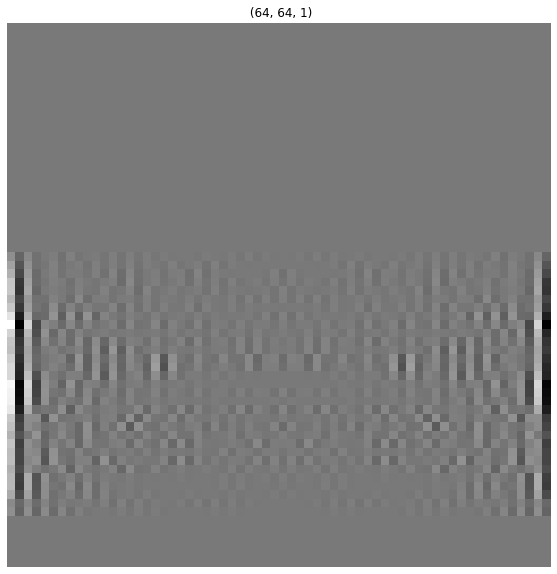

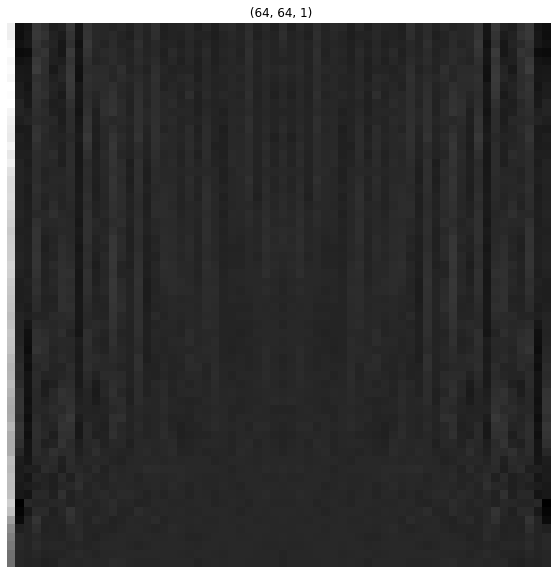

In [8]:
# using tf.signal.fft and friends...
def load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=4)
    image = tf.reshape(image, (64, 64, 4))
    image = tf.cast(image, tf.float32)
    return image
    
def dct2d(image):
    # return tf.signal.dct(tf.transpose(tf.signal.dct(tf.transpose(image), norm="ortho")), norm="ortho")
    return tf.cast(tf.signal.rfft2d(image), "float32")

def show_grayscale(image, title=''):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_axis_off()
    ax.set_title("{} {}".format(title, image.shape))
    plt.show()

    
image_1 = tf.constant([
    [
        [0.1, 0.1, 0.1, 1],
        [1.0, 1.0, 1.0, 1]
    ],
    [
        [0.1, 0.1, 0.1, 1],
        [0.2, 0.2, 0.2, 0]
    ],
], dtype="float32")
image_2 = load_image("./datasets/rpg-maker-vxace/train/2-front/50.png")
image_3 = load_image("./docs/forest.png")

# to grayscale
image_1 = tf.image.rgb_to_grayscale(image_1[:, :, 0:3])
image_2 = tf.image.rgb_to_grayscale(image_2[:, :, 0:3])
image_3 = tf.image.rgb_to_grayscale(image_3[:, :, 0:3])

# go to frequency domain
fft_1 = dct2d(image_1)
fft_2 = dct2d(image_2)
fft_3 = dct2d(image_3)

show_grayscale(fft_2)
show_grayscale(fft_3)

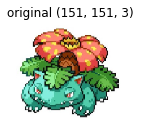

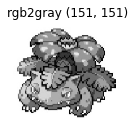

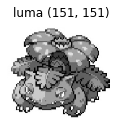

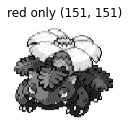

In [14]:
# investigating YUV luma as gray against the scikit-image rgb2gray
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt

def show(image, title=''):
    cmap = "viridis" if len(image.shape) > 2 else "gray"
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(image, interpolation="nearest", cmap=cmap)#, cmap=plt.cm.gray)
    ax.set_axis_off()
    ax.set_title("{} {}".format(title, image.shape))
    plt.show()

def get_luma(image):
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    luma = 0.299*red+0.587*green+0.114*blue
    return luma

blissey = io.imread("docs/venusaur.png")
show(blissey, "original")
show(rgb2gray(blissey), "rgb2gray")
show(get_luma(blissey), "luma")
show(blissey[:, :, 0], "red only")


In [1]:
# checking python's zip when one list has less items than the other
for a, b in zip([1,2,3], [4,5]):
    print(a, b)

1 4
2 5


(0, 0, 288, 288)
(288, 288)
(288, 0, 576, 288)
(288, 288)
(576, 0, 864, 288)
(288, 288)
(864, 0, 1152, 288)
(288, 288)
(1152, 0, 1440, 288)
(288, 288)
(1440, 0, 1728, 288)
(288, 288)
(0, 288, 288, 576)
(288, 288)
(288, 288, 576, 576)
(288, 288)
(576, 288, 864, 576)
(288, 288)
(864, 288, 1152, 576)
(288, 288)
(1152, 288, 1440, 576)
(288, 288)
(1440, 288, 1728, 576)
(288, 288)
(0, 576, 288, 864)
(288, 288)
(288, 576, 576, 864)
(288, 288)
(576, 576, 864, 864)
(288, 288)
(864, 576, 1152, 864)
(288, 288)
(1152, 576, 1440, 864)
(288, 288)
(1440, 576, 1728, 864)
(288, 288)
(0, 864, 288, 1152)
(288, 288)
(288, 864, 576, 1152)
(288, 288)
(576, 864, 864, 1152)
(288, 288)
(864, 864, 1152, 1152)
(288, 288)
(1152, 864, 1440, 1152)
(288, 288)
(1440, 864, 1728, 1152)
(288, 288)


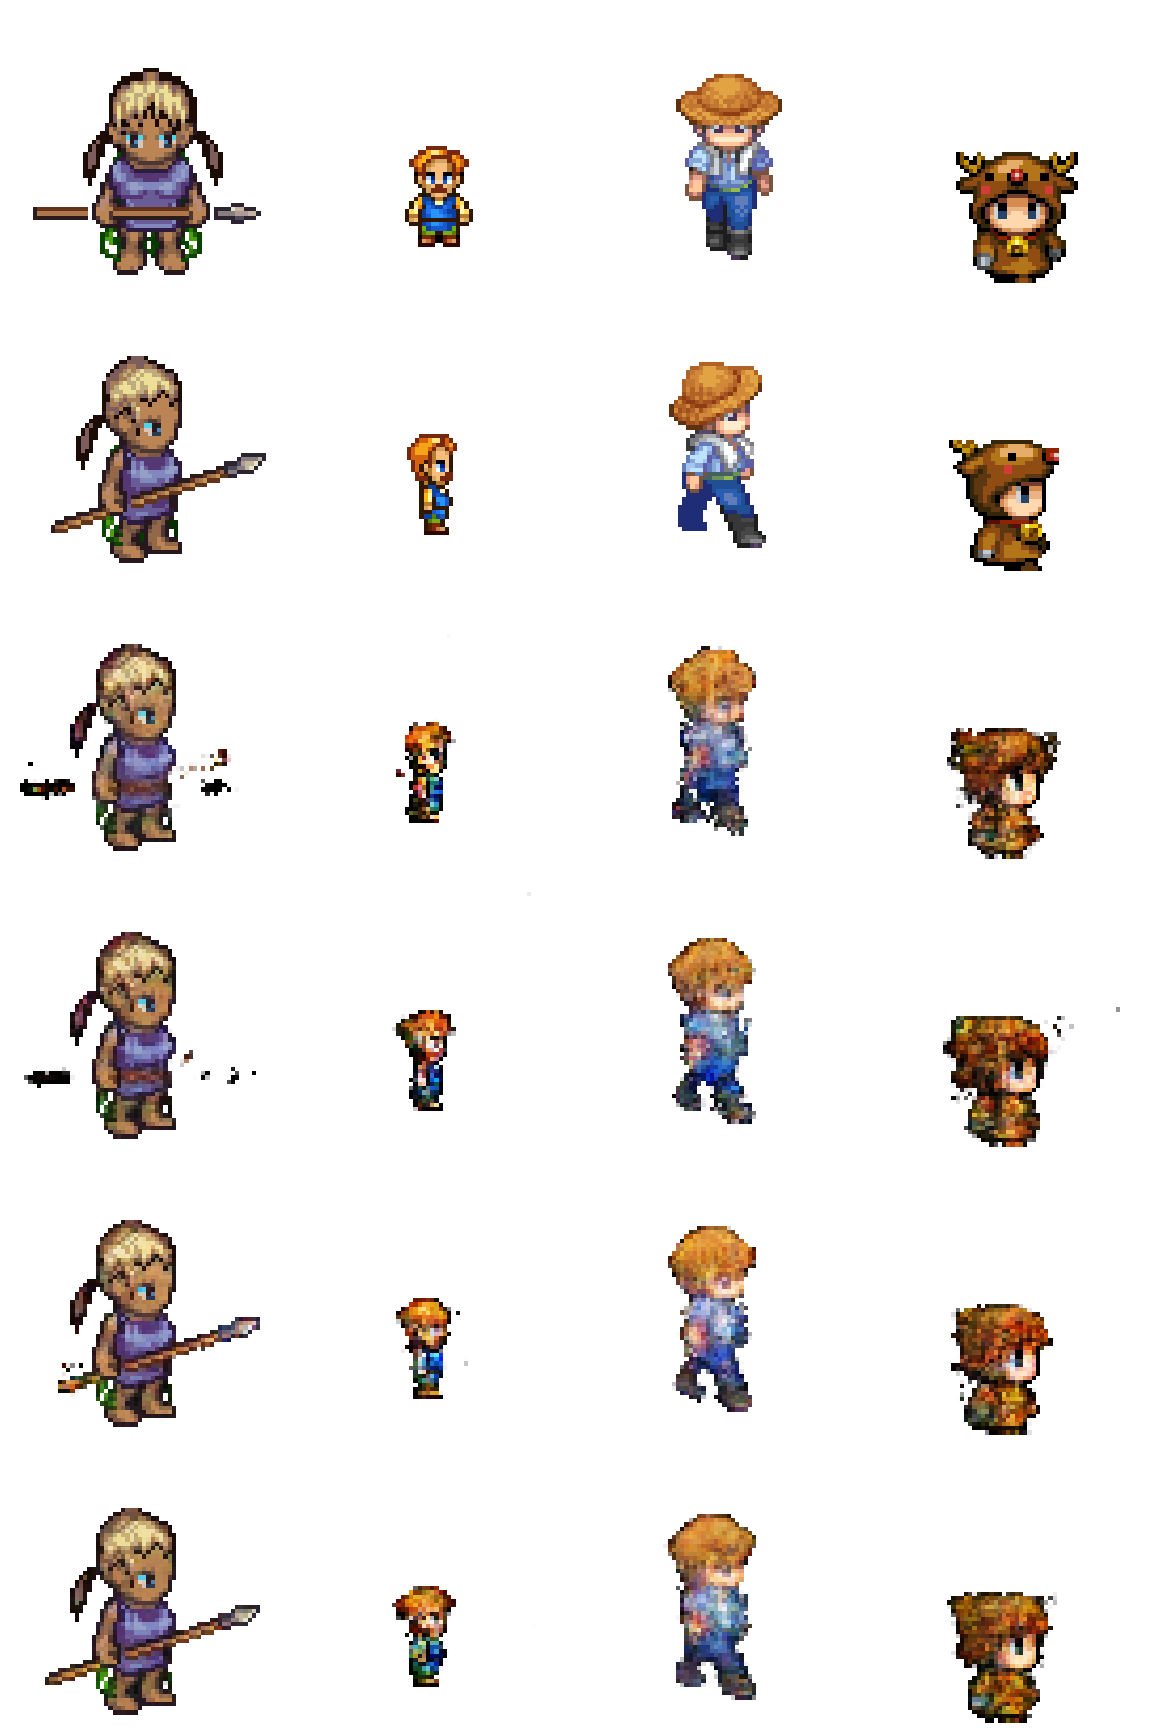

In [10]:
# crop and transpose (helper to generate images for articles)
import os
import numpy as np
import math
from PIL import Image

def crop(file_path, tile_height, tile_width):
    """
    Slices a single image with multiple sprites in various, according to the tile width and height
    """
    
    image = Image.open(file_path)
    image = image.convert("RGBA")
    image_width, image_height = image.size
    
    for i in range(image_height // tile_height):
        for j in range(image_width // tile_width):                
            tile = (j*tile_width, i*tile_height, (j+1)*tile_width, (i+1)*tile_height)
            print(tile)
            yield image.crop(tile), i, j, image_height // tile_height, image_width // tile_width

def transpose(file_path, tile_height, tile_width):
    image = Image.open(file_path).convert("RGBA")
    image_width, image_height = image.size
    
    transposed = Image.new("RGBA", (image_height, image_width))
    for (data, i, j, vertical_tiles, horizontal_tiles) in crop(file_path, tile_height, tile_width):
        print(data.size)
        transposed.paste(data, (i*tile_height, j*tile_width, (i+1)*tile_height, (j+1)*tile_width))
        
    transposed.show()
    return transposed
        

transpose("docs/patch-study.png", 288, 288)

(912, 64, 64, 4)
(912, 16384)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [26:58<00:00,  3.24s/it]


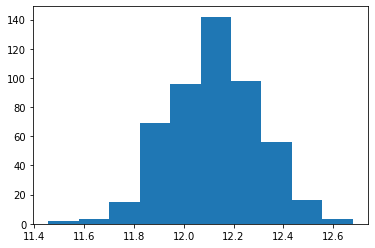

In [16]:
# calculates the intrinsic dimensionality of datasets
import intdim_mle
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def calculate_intdim(images):
    k1 = 10 # start of interval(included)
    k2 = 20 # end of interval(included)
    intdim_k_repeated = intdim_mle.repeated(intdim_mle.intrinsic_dim_scale_interval, 
                                 images, 
                                 mode='bootstrap', 
                                 nb_iter=500, # nb_iter for bootstrapping
                                 verbose=1, 
                                 k1=k1, k2=k2)
    intdim_k_repeated = np.array(intdim_k_repeated)
    # the shape of intdim_k_repeated is (nb_iter, size_of_interval) where 
    # nb_iter is number of bootstrap iterations (here 500) and size_of_interval
    # is (k2 - k1 + 1).
    # Plotting the histogram of intrinsic dimensionality estimations repeated over
    # nb_iter experiments
    plt.hist(intdim_k_repeated.mean(axis=1))
    

ic = np.array(io.ImageCollection("datasets/tiny-hero/2-front/*.png"))
print(ic.shape)
ic = ic.reshape((ic.shape[0]), -1)
print(ic.shape)
calculate_intdim(ic)


(216, 64, 64, 4)
(216, 16384)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [15:55<00:00,  1.91s/it]


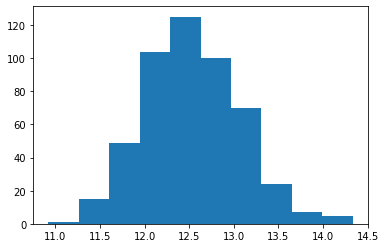

In [19]:
ic = np.array(io.ImageCollection("datasets/rpg-maker-2000/*/2-front/*.png"))
print(ic.shape)
ic = ic.reshape((ic.shape[0]), -1)
print(ic.shape)
calculate_intdim(ic)

(294, 64, 64, 4)
(294, 16384)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [17:13<00:00,  2.07s/it]


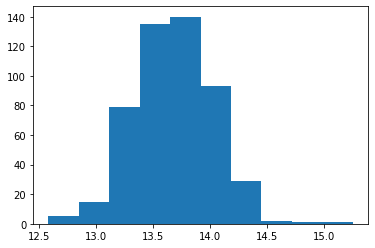

In [20]:
ic = np.array(io.ImageCollection("datasets/rpg-maker-xp/*/2-front/*.png"))
print(ic.shape)
ic = ic.reshape((ic.shape[0]), -1)
print(ic.shape)
calculate_intdim(ic)

(408, 64, 64, 4)
(408, 16384)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [23:01<00:00,  2.76s/it]


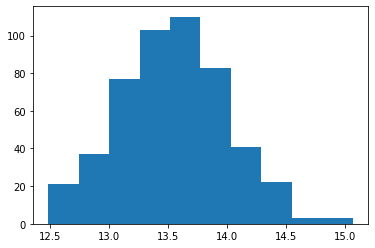

In [22]:
ic = np.array(io.ImageCollection("datasets/rpg-maker-vxace/*/2-front/*.png"))
print(ic.shape)
ic = ic.reshape((ic.shape[0]), -1)
print(ic.shape)
calculate_intdim(ic)

In [1]:
from pix2pix_model import AtrousDiscriminator, SegnetGenerator
# disc = AtrousDiscriminator()
# disc.summary()
gen = SegnetGenerator()
gen.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 conv2d_94 (Conv2D)             (None, 64, 64, 64)   4096        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 64, 64, 64)  256         ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 64, 64, 64)   0           ['batch_normalization_94[0][0

In [3]:
from io_utils import seconds_to_human_readable

seconds_to_human_readable(1000.)

'16m:40s'

Checking how to create a target domain label for StarGAN using tensorflow

In [17]:
BATCH_SIZE = 2
NUMBER_OF_DOMAINS = 4
IMG_SIZE = 2

target_domain = tf.random.uniform(shape=[BATCH_SIZE], minval=0, maxval=NUMBER_OF_DOMAINS, dtype=tf.int32)
# [0, 1, 3, 3, 0, 2] (do tamanho do batch_size)
print(target_domain)

target_domain = tf.one_hot(target_domain, NUMBER_OF_DOMAINS, axis=-1)
# [[1, 0, 0, 0],
#  [0, 1, 0 ,0],
#  [0, 0, 0, 1],
#  [0, 0, 0, 1],9+
,


#  [1, 0, 0, 0],
#  [0, 0, 1, 0]]
print(target_domain)

target_domain = target_domain[:, tf.newaxis, tf.newaxis, :]
print(target_domain)

target_domain = tf.tile(target_domain, [1, IMG_SIZE, IMG_SIZE, 1])
print(target_domain)

# target_domain = tf.repeat(target_domain, [1, 1, IMG_SIZE, 1])
# print(target_domain)

img = tf.constant([
    [
        [[0.2, 0.3, 0.4, 0.5],  [0.2, 0.3, 0.4, 0.5]],
        [[0.2, 0.3, 0.4, 0.5],  [0.2, 0.3, 0.4, 0.5]]
    ],
    [
        [[0.8, 0.9, 1.0, 0.1], [0.8, 0.9, 1.0, 0.1]],
        [[0.8, 0.9, 1.0, 0.1], [0.8, 0.9, 1.0, 0.1]]
    ]
])

tf.concat([img, target_domain], axis=-1)

tf.Tensor([0 3], shape=(2,), dtype=int32)
tf.Tensor(
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[[[1. 0. 0. 0.]]]


 [[[0. 0. 0. 1.]]]], shape=(2, 1, 1, 4), dtype=float32)
tf.Tensor(
[[[[1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[0. 0. 0. 1.]
   [0. 0. 0. 1.]]

  [[0. 0. 0. 1.]
   [0. 0. 0. 1.]]]], shape=(2, 2, 2, 4), dtype=float32)


<tf.Tensor: shape=(2, 2, 2, 8), dtype=float32, numpy=
array([[[[0.2, 0.3, 0.4, 0.5, 1. , 0. , 0. , 0. ],
         [0.2, 0.3, 0.4, 0.5, 1. , 0. , 0. , 0. ]],

        [[0.2, 0.3, 0.4, 0.5, 1. , 0. , 0. , 0. ],
         [0.2, 0.3, 0.4, 0.5, 1. , 0. , 0. , 0. ]]],


       [[[0.8, 0.9, 1. , 0.1, 0. , 0. , 0. , 1. ],
         [0.8, 0.9, 1. , 0.1, 0. , 0. , 0. , 1. ]],

        [[0.8, 0.9, 1. , 0.1, 0. , 0. , 0. , 1. ],
         [0.8, 0.9, 1. , 0.1, 0. , 0. , 0. , 1. ]]]], dtype=float32)>

Testando a ordem de fazer batch/repeat nos datasets

In [18]:
ds = tf.data.Dataset.range(5).shuffle(5).repeat().batch(1)
for e in ds.take(2):
    print(e)
    
for e in ds.take(2):
    print(e)
    
for e in ds.take(2):
    print(e)
    
for e in ds.take(2):
    print(e)

tf.Tensor([2], shape=(1,), dtype=int64)
tf.Tensor([0], shape=(1,), dtype=int64)
tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([0], shape=(1,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)


In [23]:
from configuration import *
tf.gather(DIRECTION_FOLDERS, tf.cast(tf.argmax([0., 0.,1., 0.]), "int32"))

<tf.Tensor: shape=(), dtype=string, numpy=b'2-front'>

In [8]:
def testing_multiple_return_values():
    a = 5
    b = "yay"
    return a, b

output = testing_multiple_return_values()
print(output)

(5, 'yay')
